In [16]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# To plot pretty figures
#%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "lab8"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "src_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def get_path(fig_name, fig_extension="pdf"):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    return path

In [17]:
from qiskit import QuantumCircuit, transpile, QuantumRegister,ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

## Example 3 qubits QFT

In [18]:
qc = QuantumCircuit(3)
def encode(qc, value):
    a = bin(value)
    binary_digits = a[2:]
    print(f"binary {binary_digits} {len(binary_digits)}")
    for i in range(0,len(binary_digits)):
        if binary_digits[i] == '1':
            qc.x(i)
    return qc
# qc = encode(qc, 5)

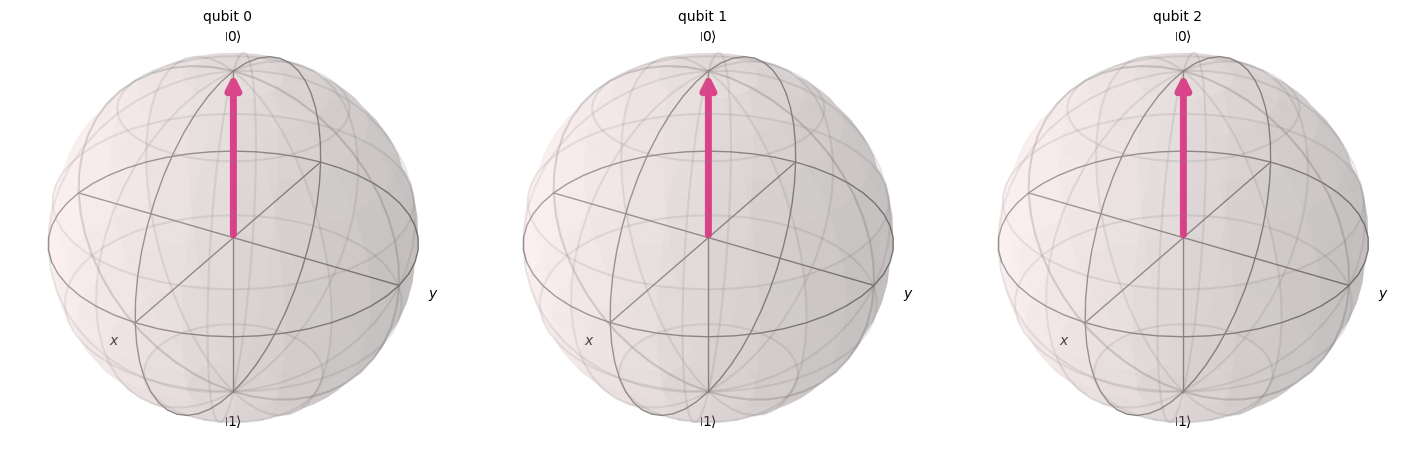

In [19]:
psi = Statevector.from_instruction(qc)
plot_bloch_multivector(psi)

In [20]:
def theta(k):
    return 2 * np.pi/2**k

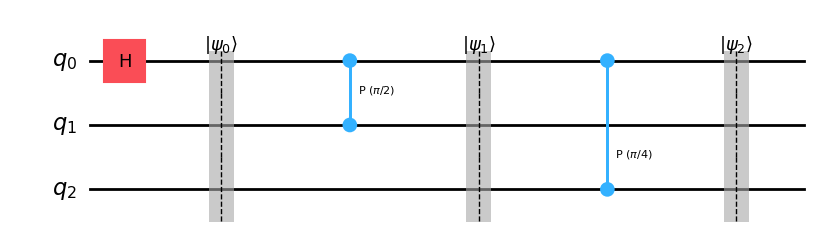

In [21]:
qc.h(0)
qc.barrier(label=r"$\vert \psi_0 \rangle$")
qc.cp(theta(2), 1, 0)
qc.barrier(label=r"$\vert \psi_1 \rangle$")
qc.cp(theta(3), 2, 0)
qc.barrier(label=r"$\vert \psi_2 \rangle$")
qc.draw(output="mpl")

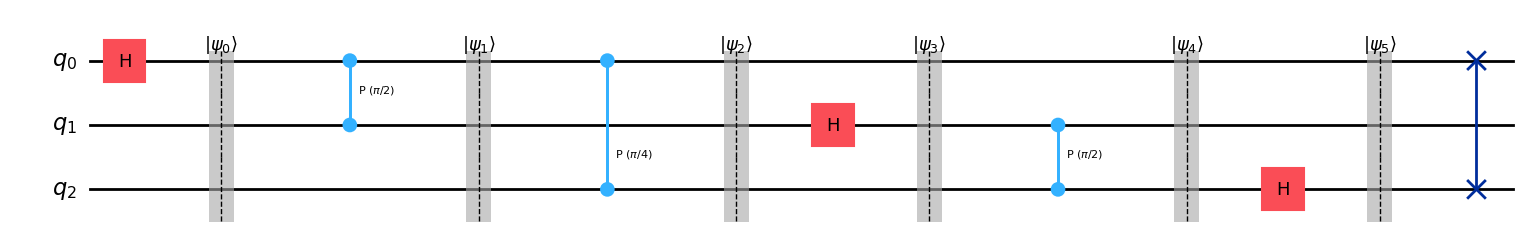

In [22]:
qc.h(1)
qc.barrier(label=r"$\vert \psi_3 \rangle$")
qc.cp(theta(2), 2,1)
qc.barrier(label=r"$\vert \psi_4 \rangle$")
qc.h(2)
qc.barrier(label=r"$\vert \psi_5 \rangle$")
qc.swap(0,2)

#qc.measure_all()
fig=qc.draw(output="mpl")
fig.savefig(
        get_path("qft_3_qubits_example"),
        bbox_inches='tight',
        pad_inches=0)
display(fig)

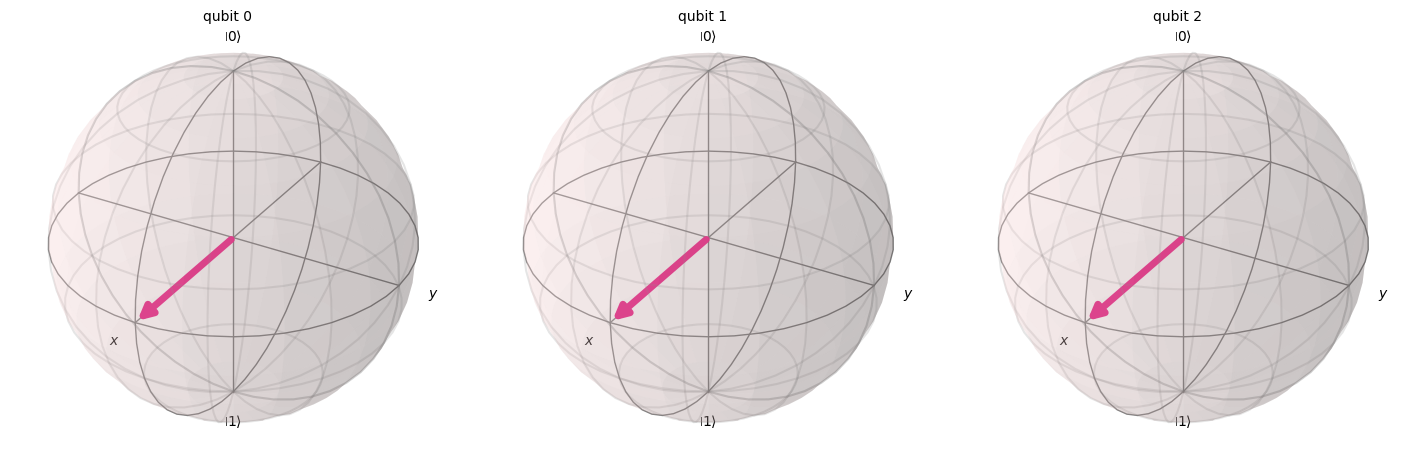

In [23]:
qc.save_statevector()

simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

# QFT

In [24]:
def qft_rotations(circuit, n, start_q):
    lambda theta: 2 * np.pi/2**k
    if start_q < n:
        circuit.h(start_q)
        for qubit in range(start_q+1, n):
            circuit.cp(theta(qubit+1-start_q), qubit, start_q)
        qft_rotations(circuit,n,start_q+1)
    else: 
        return circuit

In [25]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n,0)
    swap_registers(circuit, n)
    return circuit


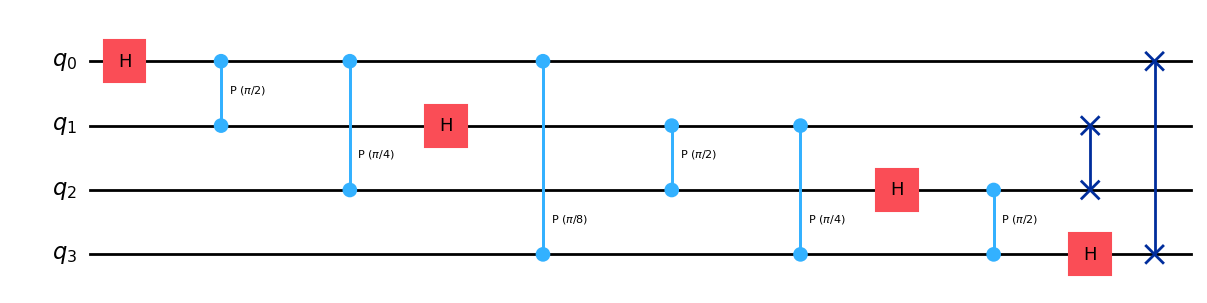

In [27]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output="mpl")

In [28]:
def encode(qc, value):
    a = bin(value)
    binary_digits = a[2:]
    print(f"binary {binary_digits} {len(binary_digits)}")
    for i in range(0,len(binary_digits)):
        if binary_digits[i] == '1':
            qc.x(i)
    return qc
qc = QuantumCircuit(3)
qc = encode(qc,5)

binary 101 3


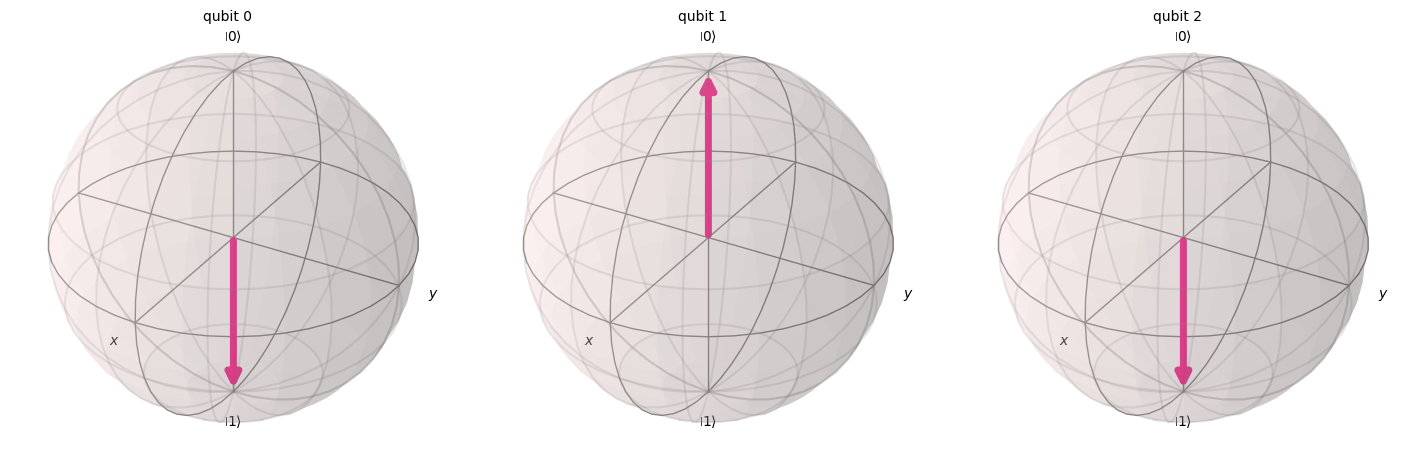

In [29]:
psi = Statevector.from_instruction(qc)
plot_bloch_multivector(psi)

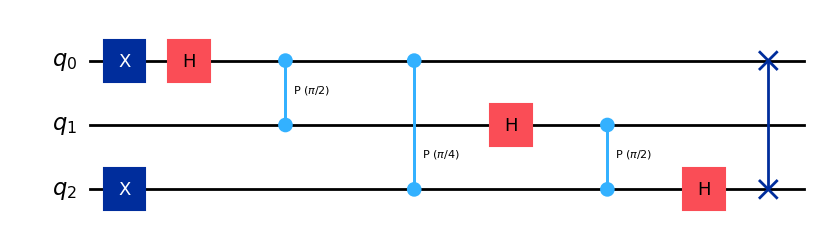

In [30]:
qft(qc,3)
qc.draw(output="mpl")

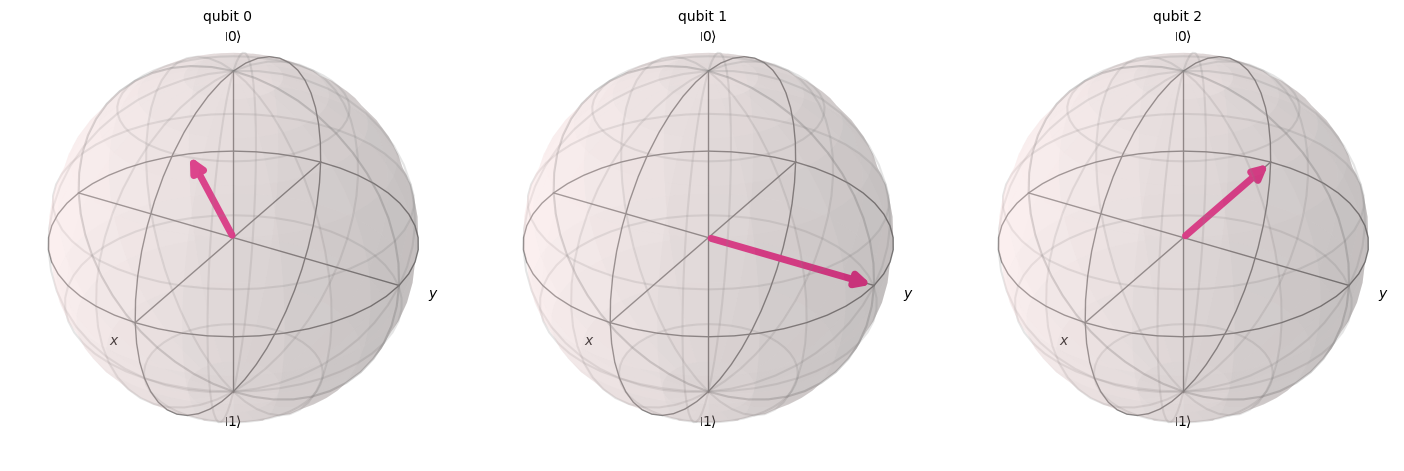

In [31]:
qc.save_statevector()

simulator = AerSimulator(method='statevector')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
plot_bloch_multivector(statevector)

# Inverse QFT

In [32]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates



In [33]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*np.pi/4,0)
qc.p(number*np.pi/2,1)
qc.p(number*np.pi,2)

qc.draw()



┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

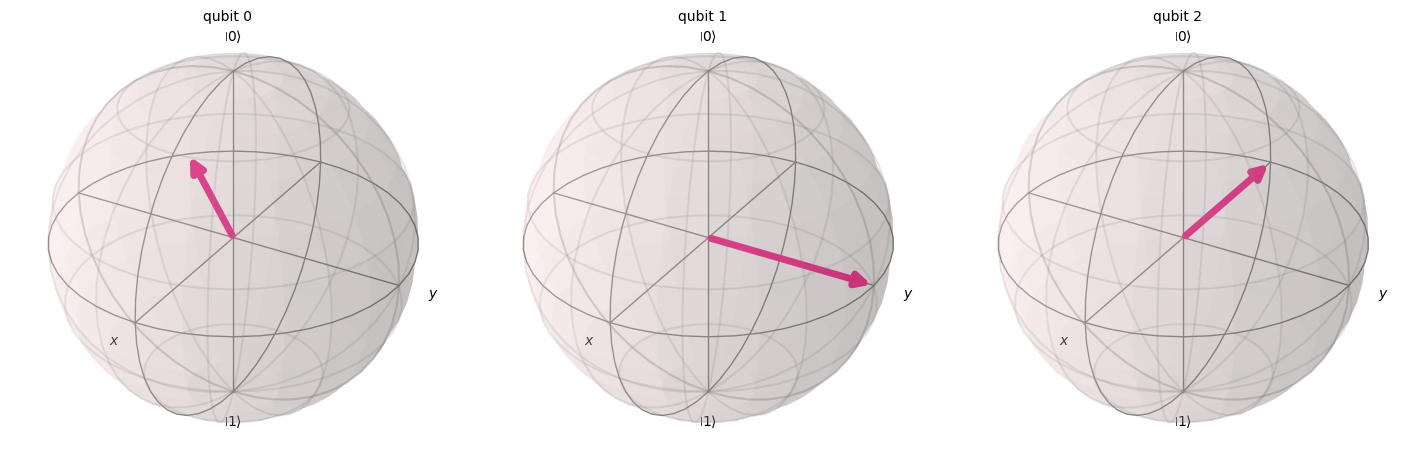

In [34]:
psi = Statevector.from_instruction(qc)
plot_bloch_multivector(psi)

In [35]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

┌────────────┐┌─────────────┐                                 »
   q_0: ┤ U(π/2,0,π) ├┤ U(0,0,5π/4) ├─X──────────────────────■────────»
        ├────────────┤├─────────────┤ │                ┌───┐ │        »
   q_1: ┤ U(π/2,0,π) ├┤ U(0,0,5π/2) ├─┼───────■────────┤ H ├─┼────────»
        ├────────────┤└┬───────────┬┘ │ ┌───┐ │P(-π/2) └───┘ │P(-π/4) »
   q_2: ┤ U(π/2,0,π) ├─┤ U(0,0,5π) ├──X─┤ H ├─■──────────────■────────»
        └────────────┘ └───────────┘    └───┘                         »
meas: 3/══════════════════════════════════════════════════════════════»
                                                                      »
«                  ┌───┐ ░ ┌─┐      
«   q_0: ─■────────┤ H ├─░─┤M├──────
«         │P(-π/2) └───┘ ░ └╥┘┌─┐   
«   q_1: ─■──────────────░──╫─┤M├───
«                        ░  ║ └╥┘┌─┐
«   q_2: ────────────────░──╫──╫─┤M├
«                        ░  ║  ║ └╥┘
«meas: 3/═══════════════════╩══╩══╩═
«                           0  1  2

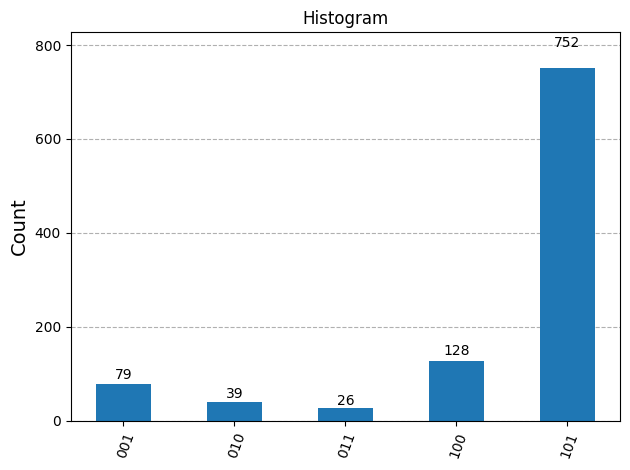

In [36]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)
results = simulator.run(qc).result()
counts = results.get_counts(qc)
plot_histogram(counts, title="Histogram")